### Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%load_ext autotime

time: 0 ns (started: 2022-02-03 21:37:41 +07:00)


In [2]:
df = pd.read_csv('dataset/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


time: 110 ms (started: 2022-02-03 21:37:41 +07:00)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Statistika deskriptif untuk variabel harga rumah

In [4]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

time: 109 ms (started: 2022-02-03 21:37:42 +07:00)


In [5]:
saleprice_mode = df['SalePrice'].mode()[0]
print(f'Nilai modus SalesPrice : ${saleprice_mode}')

Nilai modus SalesPrice : $140000
time: 125 ms (started: 2022-02-03 21:37:42 +07:00)


In [6]:
df['SalePrice'].agg([np.var, np.std])

var    6.311111e+09
std    7.944250e+04
Name: SalePrice, dtype: float64

time: 172 ms (started: 2022-02-03 21:37:42 +07:00)


In [7]:
sale_max = df['SalePrice'].max()
sale_min = df['SalePrice'].min()

print(f'Rentang SalePrice : ${sale_max - sale_min}')

Rentang SalePrice : $720100
time: 156 ms (started: 2022-02-03 21:37:42 +07:00)


### Statistika deskriptif untuk variabel harga rumah setiap tahunnya.

In [8]:
df.groupby('YrSold')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
YrSold,,,,,,,,
2006,314.0,182549.458599,79426.838855,35311.0,131375.0,163995.0,218782.5,625000.0
2007,329.0,186063.151976,85768.171410,39300.0,129900.0,167000.0,219500.0,755000.0
2008,304.0,177360.838816,69735.610685,40000.0,131250.0,164000.0,207000.0,446261.0
2009,338.0,179432.103550,80879.237311,34900.0,125250.0,162000.0,212750.0,582933.0
2010,175.0,177393.674286,80451.280085,55000.0,128100.0,155000.0,213250.0,611657.0


time: 157 ms (started: 2022-02-03 21:37:42 +07:00)


### Distribution of SalePrice 

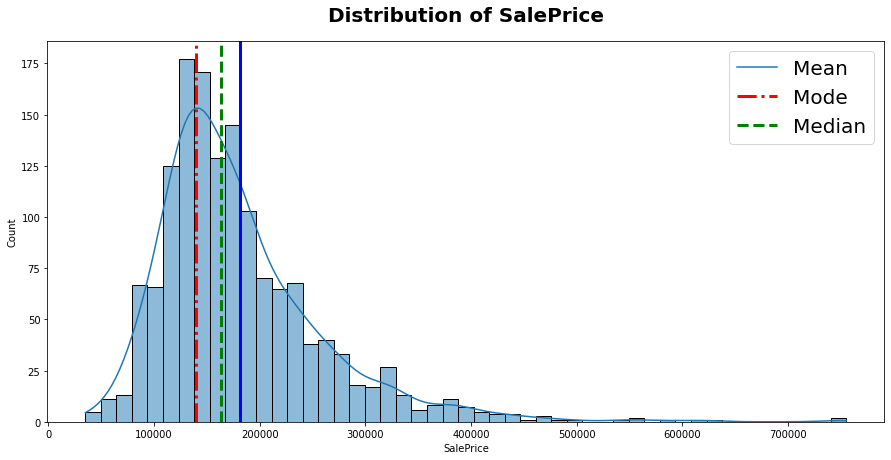

time: 797 ms (started: 2022-02-03 21:37:43 +07:00)


In [9]:
plt.figure(figsize=(15, 7))
sns.histplot(data=df, x='SalePrice', kde=True)
plt.title('Distribution of SalePrice', fontsize=20, fontweight='bold', pad=20)
plt.axvline(x=df['SalePrice'].mode()[0], color='red', linestyle='-.', linewidth=3)
plt.axvline(x=df['SalePrice'].median(), color='green', linestyle='--', linewidth=3)
plt.axvline(x=df['SalePrice'].mean(), color='blue', linewidth=3)
plt.legend(['Mean', 'Mode', 'Median'], fontsize=20)
plt.show()

Karena distribusi harga rumah skew ke kanan maka ukuran pusat yang lebih baik digunakan adalah nilai median. Nilai median pilihan yang paling baik pada distribusi data yang skew (mempunyai nilai outliers) karena nilai median robust terhadap outliers.

### Hypothesis Testing

- H0 = Rata-rata harga rumah pada tahun 2008 tidak berbeda dengan rata-rata harga rumah pada tahun 2009.
- H1 = Rata-rata harga rumah pada tahun 2008 berbeda dengan rata-rata harga rumah pada tahun 2009.

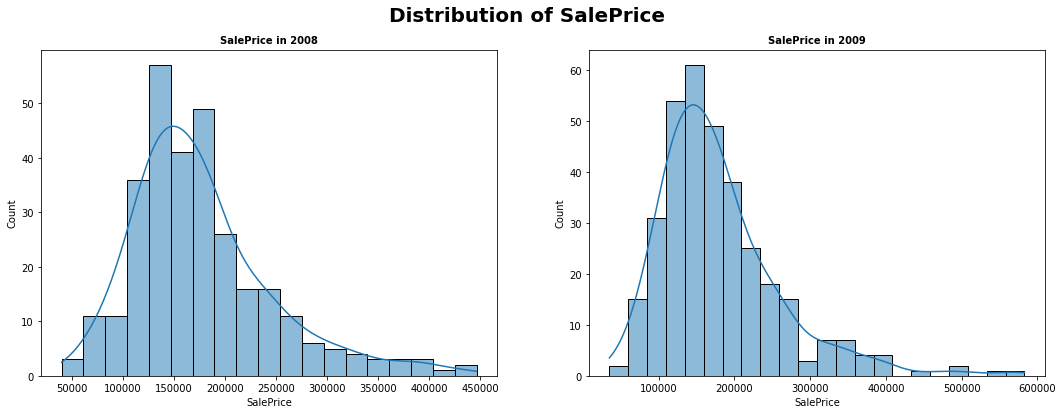

time: 907 ms (started: 2022-02-03 21:37:43 +07:00)


In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
plt.suptitle('Distribution of SalePrice', fontsize=20, fontweight='bold')

sns.histplot(data=df[df['YrSold'] == 2008], x='SalePrice', kde=True, ax=ax[0])
ax[0].set_title('SalePrice in 2008', fontsize=10, fontweight='bold')

sns.histplot(data=df[df['YrSold'] == 2009], x='SalePrice', kde=True, ax=ax[1])
ax[1].set_title('SalePrice in 2009', fontsize=10, fontweight='bold')
plt.show()

In [11]:
saleprice_2008 = df[df['YrSold'] == 2008]['SalePrice']
saleprice_2009 = df[df['YrSold'] == 2009]['SalePrice']

print('Rata-rata harga rumah tahun 2008 :', saleprice_2008.mean())
print('Rata-rata harga rumah tahun 2009 :', saleprice_2009.mean())

Rata-rata harga rumah tahun 2008 : 177360.83881578947
Rata-rata harga rumah tahun 2009 : 179432.10355029587
time: 15 ms (started: 2022-02-03 21:37:44 +07:00)


Karena distribusi harga rumah (SalePrice) tidak normal, maka kita gunakan non-parametric testing.

#### Mann-Whitney U Test

In [12]:
t, pvalue = stats.mannwhitneyu(saleprice_2008, saleprice_2009)

print(pvalue)
if pvalue >= 0.01:
    print('Tidak cukup untuk menentang H0')
else:
    print('Cukup bukti untuk menentang H0')

0.368016827502134
Tidak cukup untuk menentang H0
time: 15 ms (started: 2022-02-03 21:37:45 +07:00)


Kesimpulannya : Rata-rata harga rumah pada tahun 2008 tidak berbeda dengan rata-rata harga rumah pada tahun 2009.

#### Kolmogorov-Smirnov Test

In [13]:
t, pvalue = stats.ks_2samp(saleprice_2008, saleprice_2009)

print(pvalue)
if pvalue >= 0.01:
    print('Tidak cukup bukti untuk menentang H0')
else:
    print('Cukup bukti untuk menentang H0')

0.7155047425151041
Tidak cukup bukti untuk menentang H0
time: 125 ms (started: 2022-02-03 21:37:45 +07:00)


Kesimpulannya : Rata-rata harga rumah pada tahun 2008 tidak berbeda dengan rata-rata harga rumah pada tahun 2009.

#### Krusal-Wallis H Test

In [14]:
t, pvalue = stats.kruskal(saleprice_2008, saleprice_2009)

print(pvalue)
if pvalue < 0.01:
    print('Cukup bukti untuk menentang H0')
else: 
    print('Tidak cukup bukti untuk menentang H0')

0.7358730301262975
Tidak cukup bukti untuk menentang H0
time: 172 ms (started: 2022-02-03 21:37:45 +07:00)


Kesimpulannya : Rata-rata harga rumah pada tahun 2008 tidak berbeda dengan rata-rata harga rumah pada tahun 2009.